<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab10_sna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10: Social Network Analysis
## Scott Spurlock
### 3-22-2021
Adapted from: https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#This part of networkx, for community detection, needs to be imported separately.
from networkx.algorithms import community 

from collections import Counter
import operator
from operator import itemgetter


In [2]:
fn = 'https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv'
df_nodes = pd.read_csv(fn)
print(df_nodes.describe())
df_nodes.head()

         Birthdate    Deathdate            ID
count   119.000000   119.000000  1.190000e+02
mean   1631.327731  1700.268908  1.000708e+07
std      31.661373    30.829410  6.039569e+03
min    1551.000000  1656.000000  1.000010e+07
25%    1618.000000  1678.500000  1.000289e+07
50%    1630.000000  1696.000000  1.000678e+07
75%    1651.000000  1717.000000  1.001057e+07
max    1699.000000  1777.000000  1.005485e+07


,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [3]:
fn = 'https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv'
df_edges = pd.read_csv(fn)
print(df_edges.describe())
df_edges.head()

            Source        Target
count          174           174
unique          78            77
top     George Fox  William Penn
freq            17            11


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [4]:
node_names = df_nodes['Name']
edges = []
for index, row in df_edges.iterrows():
    source = row['Source']
    target = row['Target']
    edges.append((source, target))



In [5]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)


In [6]:
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


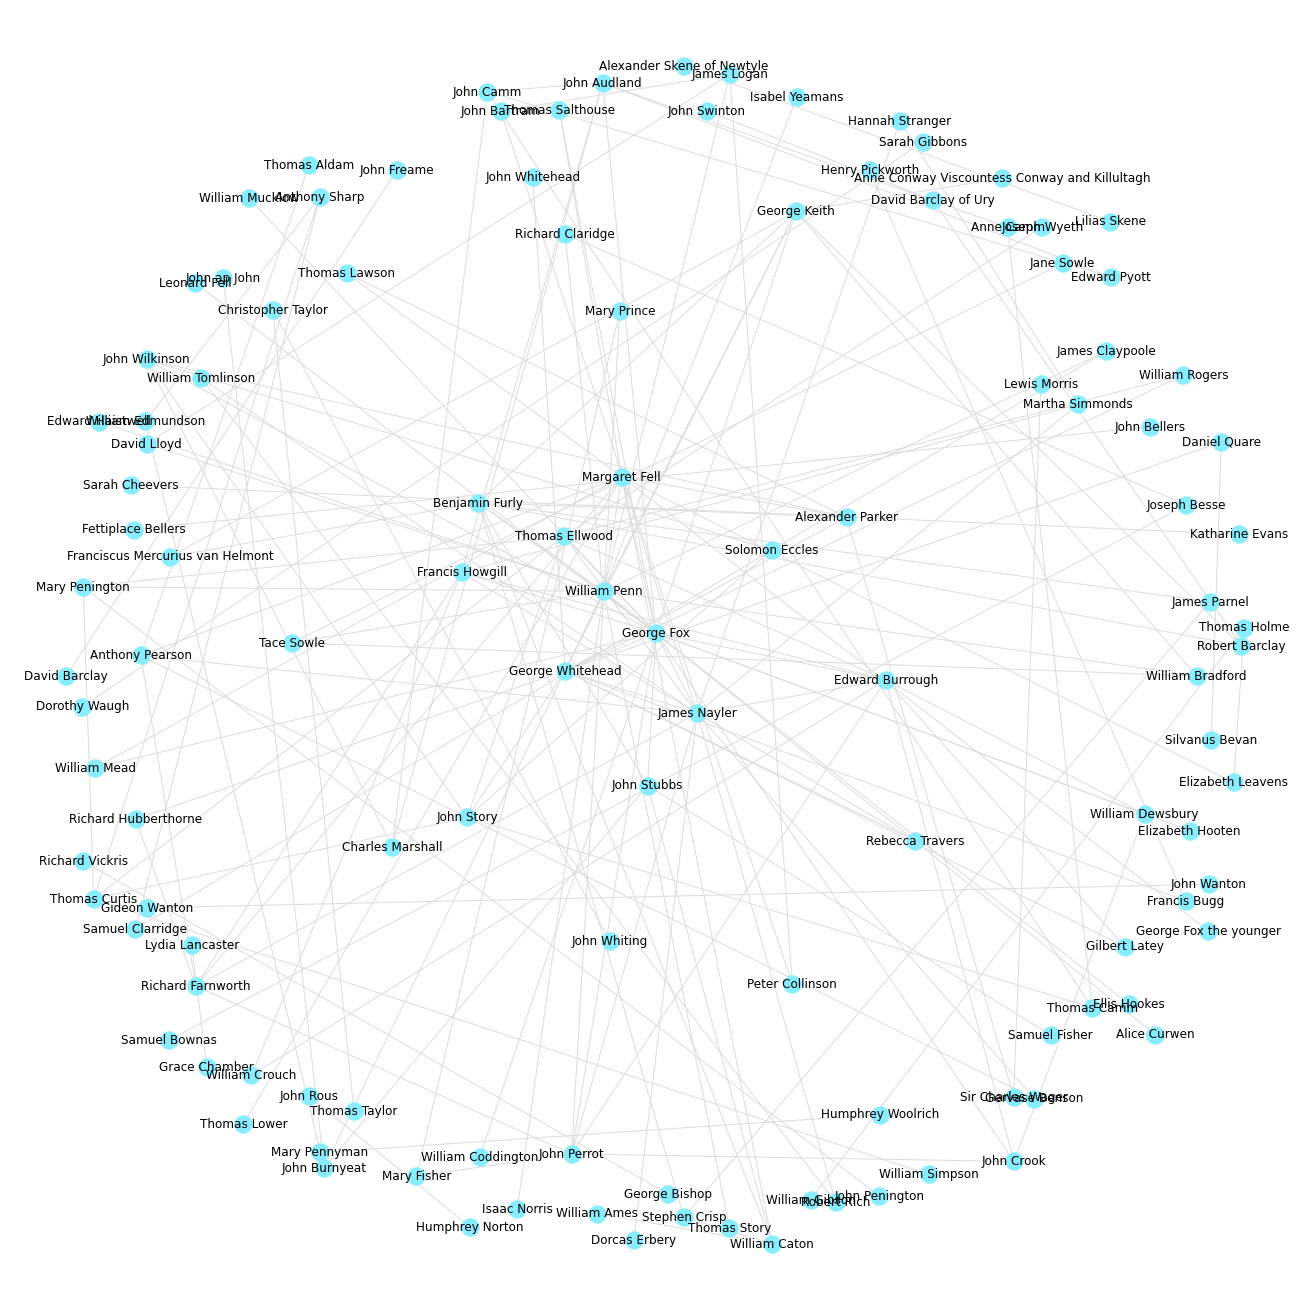

In [7]:
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G, k=1.2)
nx.draw(G, pos=pos, with_labels=True, edge_color='#dddddd', node_color='#88eeff')
plt.show()

In [8]:
density = nx.density(G)
print("Network density:", density)


Network density: 0.02478279447372169


In [9]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)


Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [10]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [11]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')


In [12]:
G.nodes['William Penn']


{'degree': 18}

In [13]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)
    

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [14]:
howgill_path = nx.shortest_path(G, source="Francis Howgill", target="Elizabeth Leavens")

print("Shortest path between Howgill and Leavens:", howgill_path)


Shortest path between Howgill and Leavens: ['Francis Howgill', 'George Fox', 'Margaret Fell', 'Elizabeth Leavens']


In [15]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)


Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [16]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)


Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

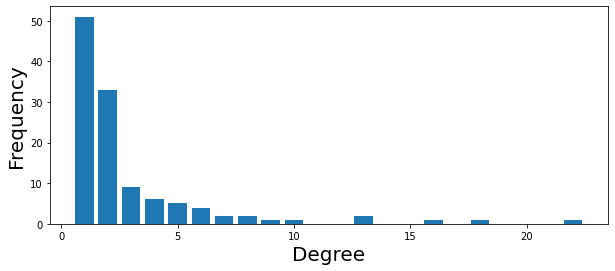

In [17]:
c = Counter(degree_dict.values())
s = sorted(c.most_common())
x = [a[0] for a in s]
y = [a[1] for a in s]
plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

In [18]:
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigen[:20]:
    print(b)


Top 20 nodes by eigenvector centrality:
('George Fox', 0.4491750710859924)
('James Nayler', 0.3352974100447867)
('William Penn', 0.2703220115399868)
('Margaret Fell', 0.253170949905681)
('George Whitehead', 0.2497455334914196)
('Edward Burrough', 0.23147427604862297)
('Francis Howgill', 0.1909539378268105)
('Benjamin Furly', 0.1878520634691651)
('John Perrot', 0.1849692807795611)
('George Keith', 0.18384690867915351)
('Thomas Ellwood', 0.17608142535843857)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.1327158126880779)
('Rebecca Travers', 0.1184804064465093)
('Alexander Parker', 0.11587808682088324)
('Anthony Pearson', 0.11120476725256784)
('William Dewsbury', 0.11057869321157121)
('John Stubbs', 0.10693500692141825)
('John Audland', 0.0983088971933375)
('Thomas Salthouse', 0.09548628544138771)


In [19]:
degree_cent_dict = nx.degree_centrality(G)
sorted_degree_cent = sorted(degree_cent_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degree_cent[:20]:
    print(b)


Top 20 nodes by degree centrality:
('George Fox', 0.1864406779661017)
('William Penn', 0.15254237288135594)
('James Nayler', 0.13559322033898305)
('George Whitehead', 0.11016949152542373)
('Margaret Fell', 0.11016949152542373)
('Benjamin Furly', 0.0847457627118644)
('Edward Burrough', 0.07627118644067797)
('George Keith', 0.06779661016949153)
('Thomas Ellwood', 0.06779661016949153)
('Francis Howgill', 0.059322033898305086)
('John Perrot', 0.059322033898305086)
('John Audland', 0.05084745762711865)
('Richard Farnworth', 0.05084745762711865)
('Alexander Parker', 0.05084745762711865)
('John Story', 0.05084745762711865)
('John Stubbs', 0.0423728813559322)
('Thomas Curtis', 0.0423728813559322)
('John Wilkinson', 0.0423728813559322)
('William Caton', 0.0423728813559322)
('Anthony Pearson', 0.0423728813559322)


In [20]:
# Shortest path between Francis Howgill and Elizabeth Leavens
nx.shortest_path(G, source= 'Francis Howgill',target='Elizabeth Leavens')

['Francis Howgill', 'George Fox', 'Margaret Fell', 'Elizabeth Leavens']

## Questions
1. Describe the structure of the early Quaker social network by looking at a visualization of a graph. What can you tell about the structure visually?
  - There appear to be a few central figures who are highly connected, and a lot of other people who are not very well connected.
2. Is this a dense or sparse network? Why?
  - Network density is 0.02478. That means only 2.5% of possible edges are present in the graph, which is very sparse. On the other hand, that includes a lot of mostly unconnected nodes around the outside of the visualization; the density of the inner part of the network is probably much higher.

3. Who are the 5 most important people (hubs) in terms of being connected to the most people?
  - ('George Fox', 0.1864406779661017)
  - ('William Penn', 0.15254237288135594)
  - ('James Nayler', 0.13559322033898305)
  - ('George Whitehead', 0.11016949152542373)
  - ('Margaret Fell', 0.11016949152542373)

4. What is the shortest path through the network from Francis Howgill and Elizabeth Leavens? (You can write a line of code to have networkx calculate this.)
  - ['Francis Howgill', 'George Fox', 'Margaret Fell', 'Elizabeth Leavens']
5. If you compare the lists of top 20 nodes in the graph in terms of degree versus betweenness centrality, there are many differences. Why are the lists different?
  - They are measuring different things. Degree centrality is measuring how well connected a node is (number of edges), while betweenness is measuring how many shortest paths in the network pass through a given node (how much a node is a broker that bridges different groups).
6. What can you infer from the fact that Elizabeth Leavens has a low degree, but relatively high betweenness centrality?
  - She is not connected to a lot of people, but she bridges different otherwise disconnected groups.